# 5월 17일 

In [ ]:
import pandas as pd

In [2]:
import tensorflow

ImportError: cannot import name 'saveable_objects_from_trackable' from 'tensorflow.python.training.saving.saveable_object_util' (C:\Users\kyun\anaconda3\lib\site-packages\tensorflow\python\training\saving\saveable_object_util.py)

In [23]:
df = pd.read_csv('mnist_train.csv')

In [24]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
import numpy as np
import tensorflow as tf         # tensorflow 기본
from tensorflow.keras.models import Sequential   # 모델 BOX 정의
from tensorflow.keras.layers import Flatten, Dense   # 모델 BOX Input Layer, Output layer
from tensorflow.keras.optimizers import SGD   # 알고리즘 담당
from sklearn.model_selection import train_test_split   # train, test 데이터를 분리
from sklearn.preprocessing import MinMaxScaler    # 데이터 정규화  - 큰숮자를 작은 숫자로 변경 (-1 ~ 1)

In [26]:
X_data = df.drop('label', axis=1, inplace=False)

In [27]:
X_data.shape

(60000, 784)

In [28]:
Y_data = df['label']

In [29]:
# 픽셀 데이터를 정규화(0~1 사이의 실수로 변환)
scaler = MinMaxScaler()                    # scaler 객체 생성
scaler.fit(X_data)                         # scaler 객체를 학습
norm_x_data = scaler.transform(X_data)     # scaler를 통해서 실제값을 변환

In [30]:
norm_train_x_data, norm_test_x_data, train_y_data, test_y_data = train_test_split(norm_x_data, Y_data, test_size=0.3)

In [31]:
norm_train_x_data.shape

(42000, 784)

In [32]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [33]:
model =  Sequential()

In [34]:
model.add(Conv2D(filters=32,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu',
    input_shape=(28,28,1)))

In [35]:
model.add(Conv2D(filters=64,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu'))

In [36]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [37]:
model.add(Conv2D(filters=64,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu'))

In [38]:
# FC layer(DNN) 의; input Layer
model.add(Flatten())  # 전체 4차원 에서 2차원으로 바꾸주는것

In [39]:
# hidden  layer

model.add(Dense(units=256, activation='relu'))

In [40]:
# output  layer
model.add(Dense(units=10, activation='softmax'))

In [41]:
#model이 어떻게 동작하는지를 지정
model.compile(optimizer=SGD(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [42]:
norm_train_x_data.shape

(42000, 784)

In [43]:
norm_train_x_data=norm_train_x_data.reshape(-1,28,28,1) # 알아서 맞추기 

In [44]:
norm_train_x_data.shape

(42000, 28, 28, 1)

In [45]:
# 설정을 모두 마치었으면 모델 학습
history = model.fit(norm_train_x_data, train_y_data, epochs=30,
         verbose=1,
         validation_split=0.2)

Epoch 1/30
1050/1050 [==============================] - 35s 33ms/step - loss: 2.2898 - accuracy: 0.1671 - val_loss: 2.2783 - val_accuracy: 0.2230
Epoch 2/30
1050/1050 [==============================] - 35s 33ms/step - loss: 2.2669 - accuracy: 0.2789 - val_loss: 2.2532 - val_accuracy: 0.3324
Epoch 3/30
1050/1050 [==============================] - 35s 33ms/step - loss: 2.2387 - accuracy: 0.3606 - val_loss: 2.2202 - val_accuracy: 0.4005
Epoch 4/30
1050/1050 [==============================] - 35s 33ms/step - loss: 2.1991 - accuracy: 0.4203 - val_loss: 2.1713 - val_accuracy: 0.4620
Epoch 5/30
1050/1050 [==============================] - 35s 34ms/step - loss: 2.1369 - accuracy: 0.4880 - val_loss: 2.0908 - val_accuracy: 0.5288
Epoch 6/30
1050/1050 [==============================] - 37s 35ms/step - loss: 2.0290 - accuracy: 0.5611 - val_loss: 1.9452 - val_accuracy: 0.6206
Epoch 7/30
1050/1050 [==============================] - 36s 34ms/step - loss: 1.8275 - accuracy: 0.6573 - val_loss: 1.6713 -

In [46]:
# 다중분류냐 아니냐 ! 

In [47]:
# 최종적으로 각 신경망
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1638656   
                                                      

In [48]:
# 그래프까지 그리기 

In [49]:
import matplotlib.pyplot as plt

In [ ]:
epochs = range(leb(acc))
plt.plot(epochs, acc, 'bo',label = 'Training accuracy')
plt.plot(epochs,val_acc , 'b', lable = 'validation accuracy')
plt.tile('')
plt.lengend()
plt.figure()

plt.plot(epochs,loss,'bo',label = 'Training loss')

In [50]:
acc = history.history['accuracy']
loss =  history.history['loss']
val_acc =  history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()

In [51]:
epochs = range(len(acc))

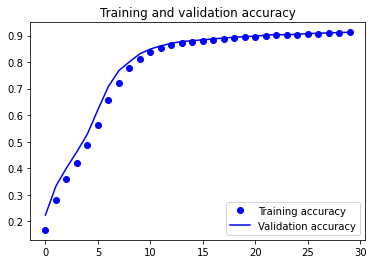

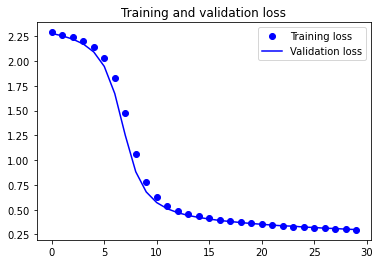

In [52]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1638656   
                                                      

In [1]:
import os
os.getcwd()

'C:\\Users\\kyun\\python lib\\수업'

# cnn 이미지 처리 

In [3]:
import numpy as np
import tensorflow        # tensorflow 기본
from tensorflow.keras.models import Sequential   # 모델 BOX 정의
from tensorflow.keras.layers import Flatten, Dense   # 모델 BOX Input Layer, Output layer
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam   # 알고리즘 담당
from sklearn.model_selection import train_test_split   # train, test 데이터를 분리
from tensorflow.keras.preprocessing.image import ImageDataGenerator   # 데이터 정규화  - 큰숮자를 작은 숫자로 변경 (-1 ~ 1)

In [4]:
#  아마자 대아토 갹채 샹송'


Train_data = ImageDataGenerator(rescale = 1/255)
Test_data = ImageDataGenerator(rescale = 1/255)
train_dir = './cats_and_dogs_filtered/train/'
test_dir = './cats_and_dogs_filtered/validation/'

In [5]:
train_generator = Train_data.flow_from_directory(
    train_dir,  #  학습요 이미지 폴더 
    classes=['cats', 'dogs'] , # cats 포디 이미지 label을 0으로 # dogs 폴터의 이미지는  label을 1로 가져간다 .
    target_size=(150,150) ,     # 이미지를 리사이즈 
    batch_size = 20 ,         # 한번에 20개의 이미지만  가져온다.  
    class_mode='binary', # 이진분류 
) # 학습용 이미지를 가져올 폴더 

test_generator = Test_data.flow_from_directory(
    test_dir,  #  학습요 이미지 폴더 
    classes=['cats', 'dogs'] , # cats 포디 이미지 label을 0으로 # dogs 폴터의 이미지는  label을 1로 가져간다 .
    target_size=(150,150) ,     # 이미지를 리사이즈 
    batch_size = 10 ,         # 한번에 10개의 이미지만  가져온다.  
    class_mode='binary', # 이진분류 
) # 학습용 이미지를 가져올 폴더 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
model = Sequential()


model.add(Conv2D(filters=32,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu',
    input_shape=(150,150,3)))

model.add(Conv2D(filters=64,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu'))

In [8]:
model.add(Flatten()) 
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=1, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

 # 오류 unexpected EOF while parsing 괄호닫기

In [13]:
history = model.fit(train_generator,
        steps_per_epoch=100,
         epochs=1,
         verbose=1,
         validation_data = test_generator,
         validation_steps=50)


100/100 [==============================] - 179s 2s/step - loss: 0.6996 - accuracy: 0.5000 - val_loss: 0.6624 - val_accuracy: 0.5140


In [ ]:
# model.predict(y_train)
# 플링 ! / 

In [1]:
# plot 까지 ! 

SyntaxError: invalid syntax (1044367101.py, line 1)

In [2]:
import tensorflow

In [ ]:
# 안될때는 디렉토리를 추가하자 

In [ ]:
132

In [ ]:

이미, 자연어 처리 , 1번 기업 ! / 기업 ,관심사 , 언어, / 통계 프로젝트 ,/ 

/데이터 셋, / 기업 , / 


# 5월 18일 전이학습 

In [ ]:
3 차원 이니까 필터도 3개가 필요해 

In [ ]:
각각하나를 만들어서 합친다 . 채널 3차원 2차원이지만 3차원으로 나와 , / 필터 2차원으로 엑티브 맵이 구성이 되고 각자 3차원으로 구성된다 .


In [ ]:
컨볼루션 , 필터가 정해주고, 3*3 4*4 정방형 데이터 , / 모르지만 필터 가정하고 , 이미지도 가정하고 곱해 / 컬러면 3개가 동시에 ,/

In [ ]:
# 스트라이브에서 만약 1이면 한칸움직여 , / 표현식 , 합성곱에서 , 활성함수, 

In [ ]:
# 핏처 맵 , 분류 , / 여기 까지는 굉장히 자원이 플요하다. 누가 ? 구글이나 ms 수행한 미리 학습해놓은 결과를 가져다 쓴다. 

In [ ]:
# 전이학습 ~ 남에꺼 , /똑같은 것을 전이 학습 한다. vgg 16 

In [4]:
# 전이학습에 대해서 알아봅시다. 
from tensorflow.keras.applications import VGG16 # 전이학습
model_base = VGG16( weights = 'imagenet',
                   include_top =False,
                   input_shape = (150,150,3))

In [21]:

print(model_base.summary())

58889256/58889256 [==============================] - 20s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                             

In [7]:
# VGG16으로 이미 만들어저셔 필요가 없다. 


from tensorflow.keras.applications import VGG16 # 전이학습
model_base = VGG16( weights = 'imagenet',
                   include_top =False,
                   input_shape = (150,150,3))
model.add(model_base) # 모델 추가 

In [5]:
import numpy as np
import tensorflow        # tensorflow 기본
from tensorflow.keras.models import Sequential   # 모델 BOX 정의
from tensorflow.keras.layers import Flatten, Dense   # 모델 BOX Input Layer, Output layer
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam   # 알고리즘 담당
from sklearn.model_selection import train_test_split   # train, test 데이터를 분리
from tensorflow.keras.preprocessing.image import ImageDataGenerator   # 데이터 정규화  - 큰숮자를 작은 숫자로 변경 (-1 ~ 1)

In [6]:
#  아마자 대아토 갹채 샹송'
model = Sequential()
Train_data = ImageDataGenerator(rescale = 1/255)
Test_data = ImageDataGenerator(rescale = 1/255)
train_dir = './cats_and_dogs_filtered/train/'
test_dir = './cats_and_dogs_filtered/validation/'

In [18]:
train_generator = Train_data.flow_from_directory(
    train_dir,  #  학습요 이미지 폴더 
    classes=['cats', 'dogs'] , # cats 포디 이미지 label을 0으로 # dogs 폴터의 이미지는  label을 1로 가져간다 .
    target_size=(150,150) ,     # 이미지를 리사이즈 
    batch_size = 20 ,         # 한번에 20개의 이미지만  가져온다.  
    class_mode='binary', # 이진분류 
) # 학습용 이미지를 가져올 폴더 

test_generator = Test_data.flow_from_directory(
    test_dir,  #  학습요 이미지 폴더 
    classes=['cats', 'dogs'] , # cats 포디 이미지 label을 0으로 # dogs 폴터의 이미지는  label을 1로 가져간다 .
    target_size=(150,150) ,     # 이미지를 리사이즈 
    batch_size = 10 ,         # 한번에 10개의 이미지만  가져온다.  
    class_mode='binary', # 이진분류 
) # 학습용 이미지를 가져올 폴더 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
# 플레튼 해야 해 !
# FC layer (DNN) input layer 

model.add(Flatten())
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001),# 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 모델 박스는 가지고 와야해 
# model.add(Flatten()) 
#  #  히든레이어 안해도돼 model.add(Dense(units=256, activation='relu'))
# model.add(Dense(units=1, activation='softmax')) # 


In [19]:
history = model.fit(train_generator,
        steps_per_epoch=100,
         epochs=1,
         verbose=1,
         validation_data = test_generator,
         validation_steps=50)


100/100 [==============================] - 393s 4s/step - loss: 0.5075 - accuracy: 0.7450 - val_loss: 0.3740 - val_accuracy: 0.8220
